Adapted from Geospatial Tech YouTube: https://www.youtube.com/watch?v=IHZdXR1SUSo&t=309s

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mytrainingdata = pd.read_csv('train_data.csv',index_col=0) #added index
mytestdata = pd.read_csv('test_data.csv',index_col=0) #added index

In [3]:
mytrainingdata.describe()

,Max_Demand_GW,Plant_Production_GWh,Imports_GWh,Renewables_Production_GWh,emissions_c02_GG,GDP_bln,Population_k,tmin,tavg,tmax
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.353125,187.730937,21.401302,1.036406,50.636250,7.610000,425.121875,16.189323,19.382812,23.270312
std,0.042224,24.970164,42.986119,4.174785,9.910549,2.471671,24.893584,4.431613,5.312128,5.800390
min,0.270000,152.880000,0.000000,0.000000,32.160000,4.820000,398.580000,7.500000,10.200000,13.000000
25%,0.320000,168.407500,0.000000,0.000000,43.340000,5.692500,406.367500,12.375000,14.300000,17.475000
50%,0.350000,180.805000,0.000000,0.000000,50.250000,6.870000,415.390000,16.000000,18.900000,23.200000
75%,0.380000,200.447500,0.000000,0.000000,55.430000,9.062500,437.182500,19.800000,24.300000,28.500000
max,0.490000,266.020000,145.570000,22.240000,84.060000,12.950000,484.630000,24.000000,28.800000,33.600000


In [4]:
print(mytrainingdata.dtypes)

Max_Demand_GW                float64
Plant_Production_GWh         float64
Imports_GWh                  float64
Renewables_Production_GWh    float64
emissions_c02_GG             float64
GDP_bln                      float64
Population_k                 float64
tmin                         float64
tavg                         float64
tmax                         float64
dtype: object


In [5]:
#The input and output features preparation

In [6]:
#The input features
X_train = mytrainingdata.drop(['Max_Demand_GW','Plant_Production_GWh'],axis = 1)
y_train = mytrainingdata['Max_Demand_GW']
y_test = mytestdata['Max_Demand_GW']
X_test = mytestdata.drop(['Max_Demand_GW','Plant_Production_GWh'],axis = 1)

In [7]:
X_train.shape

(192, 8)

In [8]:
print(X_train[:10])

            Imports_GWh  Renewables_Production_GWh  emissions_c02_GG  GDP_bln  \
Date                                                                            
2003-01-01          0.0                        0.0             47.52     4.82   
2003-02-01          0.0                        0.0             52.80     4.82   
2003-03-01          0.0                        0.0             44.88     4.82   
2003-04-01          0.0                        0.0             39.60     4.82   
2003-05-01          0.0                        0.0             36.96     4.82   
2003-06-01          0.0                        0.0             50.16     4.82   
2003-07-01          0.0                        0.0             52.80     4.82   
2003-08-01          0.0                        0.0             52.80     4.82   
2003-09-01          0.0                        0.0             51.48     4.82   
2003-10-01          0.0                        0.0             44.88     4.82   

            Population_k  t

#DIDN'T NEED TO DO THIS

#Splitting the dataset into training and testing dataset
#Importing train_test_split function
from sklearn.model_selection import train_test_split

#Splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

In [9]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score,r2_score

#Instantiate the model
model = RandomForestRegressor(n_estimators = 30,random_state = 30)

#n_estimators = number of trees
#random_state = random seed for reproducibility

#Fitting the rf model to the training data
fitted_rf = model.fit(X_train, y_train)

In [10]:
#Evaluation on train

# The training r_Sq (coef of determination)
print('The training r_sq is: %.2f'% fitted_rf.score(X_train,y_train))

#Prediction on the training dataset
ytrain_pred = fitted_rf.predict(X_train)

print('The MAE is: %.2f'% mean_absolute_error(y_train,ytrain_pred))
print('The MSE is: %.2f'% mean_squared_error(y_train,ytrain_pred))
print('The RMSE is: %.2f'% np.sqrt(mean_squared_error(y_train,ytrain_pred)))
print('The EVS is: %.2f'% explained_variance_score(y_train,ytrain_pred))

The training r_sq is: 0.98
The MAE is: 0.00
The MSE is: 0.00
The RMSE is: 0.01
The EVS is: 0.98


In [11]:
#Evaluation on test

#Prediction on the testing data
ytest_pred = fitted_rf.predict(X_test)
#take input X_test and store predictions in ytest_pred

#print(ytest_pred[:10])

#The testing r_sq (coef of determination)
print('The testing r_sq is: %.2f'% r2_score(y_test,ytest_pred))
#Or this gives same result
#print('The testing r_sq is: %.2f'% fitted_rf.score(X_test,y_test))

print('The MAE is: %.2f'% mean_absolute_error(y_test,ytest_pred))
print('The MSE is: %.2f'% mean_squared_error(y_test,ytest_pred))
print('The RMSE:', np.sqrt(mean_squared_error(y_test,ytest_pred)))
print('The EVS is: %.2f'% explained_variance_score(y_test,ytest_pred))

The testing r_sq is: -0.04
The MAE is: 0.06
The MSE is: 0.00
The RMSE: 0.06691377813054428
The EVS is: 0.67


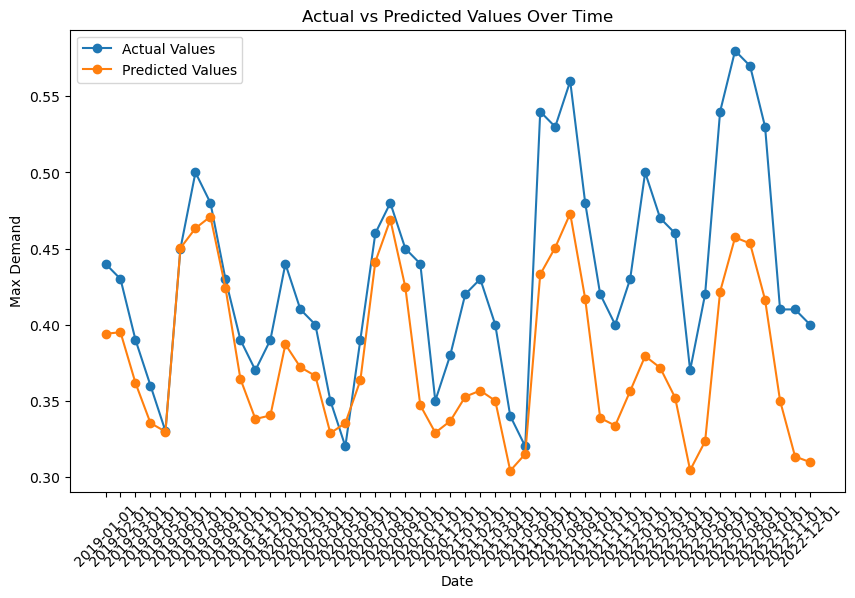

In [12]:
# Assuming X_test has a datetime index
plt.rcParams['figure.figsize'] = (10, 6)

# Plotting the observed and predicted data against date
plt.plot(y_test.index, y_test, label='Actual Values', marker='o')
plt.plot(y_test.index, ytest_pred, label='Predicted Values', marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Max Demand')
plt.title('Actual vs Predicted Values Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

Plotting the prediction errors and residuals
Installed Yellowbrick

/Users/tanobugelli/anaconda3/envs/RandomForest/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


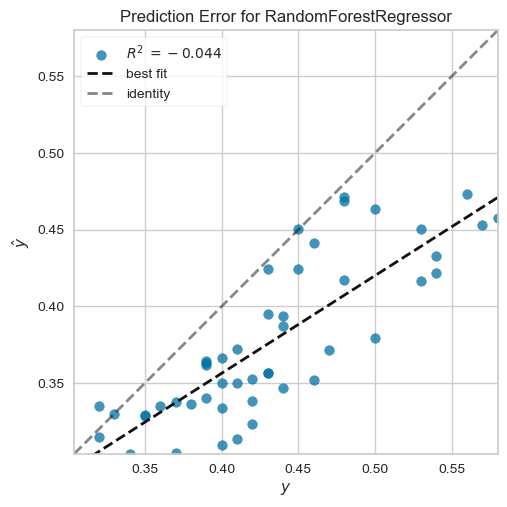

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [13]:
#Plotting the prediction errors
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(fitted_rf)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)

# Set the axes titles
#visualizer.ax.set_xlabel('Actual Values ($y$)')
#visualizer.ax.set_ylabel('Predicted Values ($\\hat{y}$)')

# Set the title
#visualizer.set_title('Prediction Error Analysis for RandomForestRegressor')

visualizer.poof()

# This visualizer is specifically designed for regression problems and helps in visualizing the difference between the true target values (y_test) and the predicted values.


# Set the axes labels using Matplotlib after poof
#plt.gca().set_xlabel('Actual Values ($y$)')
#plt.gca().set_ylabel('Predicted Values ($\\hat{y}$)')

# Display the modified plot
#plt.show()


#THIS GIVES THE SAME THING

# Visualize the overall prediction on test data
#plt.scatter(y_test, y_pred, color='blue')
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
#plt.xlabel('Actual Values (Test)')
#plt.ylabel('Predicted Values (Test)')
#plt.title('Actual vs. Predicted Values for Random Forest Regression on Test Data')
#plt.legend()
#plt.show()


Yes, in the context of regression analysis and predictive modeling, "y" and "
^
y

 " are common notations for the actual and predicted values, respectively. It has become a convention to use these symbols, especially when discussing linear regression models.

�
y: Represents the actual observed values or the dependent variable in your dataset.

�
^
y
^
​
 : Represents the predicted values generated by a regression model.

/Users/tanobugelli/anaconda3/envs/RandomForest/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


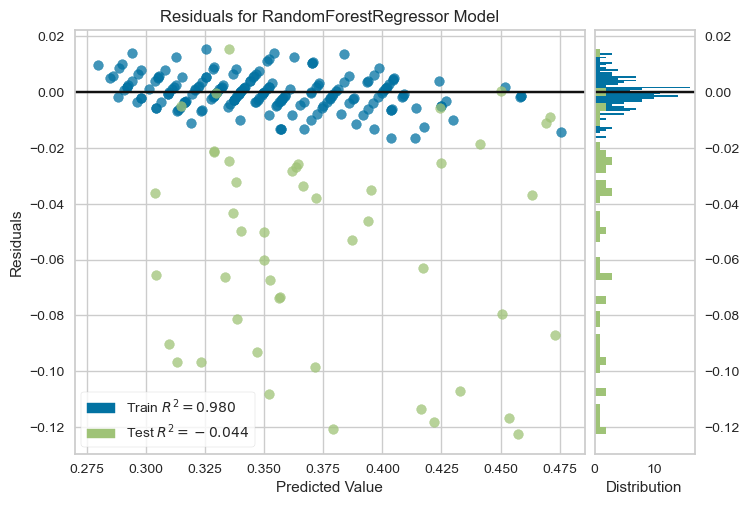

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [14]:
#Plotting the residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(fitted_rf)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

#The ResidualsPlot visualizer is used to visualize the residuals (the differences between the actual and predicted values) of a regression model.

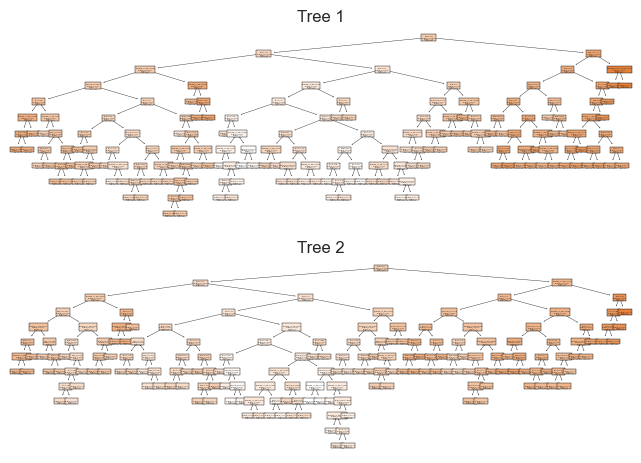

In [15]:
#VISUALIZE THE TREES IN THE RANDOM FOREST

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming X_train and y_train are your training data
# You can use your own data
# Instantiate the model
model = RandomForestRegressor(n_estimators=100, random_state=30)

# Fitting the model to the training data
fitted_rf = model.fit(X_train, y_train)

#Predict on test data
y_pred = fitted_rf.predict(X_test)
# Visualize individual decision trees
fig, axes = plt.subplots(nrows=2, ncols=1)#figsize=(20, 4), dpi=80
for i in range(2):
    plot_tree(fitted_rf.estimators_[i], feature_names=X_train.columns.tolist(), filled=True, ax=axes[i])
    axes[i].set_title(f'Tree {i + 1}')

plt.show()




#HAVE TO CHANGE THE NUMBER OF ESTIMATORS

In general, you don't need to normalize the features in a Random Forest. Random Forests are ensemble models composed of decision trees, and they are not sensitive to the scale of input features. Decision trees split nodes based on feature values and do not rely on the magnitude of the features.

Normalization (or feature scaling) is more critical for models that use distance-based metrics, such as Support Vector Machines, k-Nearest Neighbors, or neural networks, where the scale of features can impact the model's performance.



In [16]:
#EXPORT THE TREES IN THE RANDOM FOREST

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import os

# Assuming X_train and y_train are your training data
# You can use your own data
# Instantiate the model
model = RandomForestRegressor(n_estimators=100, random_state=30)

# Fitting the model to the training data
fitted_rf = model.fit(X_train, y_train)

# Create a directory to save the images
output_dir = 'tree_plots'
os.makedirs(output_dir, exist_ok=True)

# Predict on test data
y_pred = fitted_rf.predict(X_test)

# Visualize individual decision trees and save them as PNG images
for i, tree in enumerate(fitted_rf.estimators_[:10]):
    fig, ax = plt.subplots(figsize=(20, 10), dpi=600)
    plot_tree(tree, feature_names=X_train.columns.tolist(), filled=True, ax=ax)
    ax.set_title(f'Tree {i + 1}')
    
    # Save the figure as PNG
    output_path = os.path.join(output_dir, f'tree_{i + 1}.png')
    plt.savefig(output_path)
    plt.close()  # Close the figure to free up resources

# Optional: Display a message indicating that the images are saved
print(f"Tree plots saved in {output_dir}")


Tree plots saved in tree_plots


# Cross Validation

In [33]:
from numpy import absolute

#The k-fold CV
from sklearn.model_selection import cross_val_score

seed = 7

#Training model CV
score_train = cross_val_score(fitted_rf,X_train,y_train,scoring='neg_mean_squared_error',cv = 10)

print(score_train)

#The absolute mean score
print(absolute(np.mean(score_train)))

#The testing model CV
score_test = cross_val_score(fitted_rf,X_test,y_test,scoring='neg_mean_squared_error',cv=10)

print(score_test)
print(absolute(np.mean(score_test)))

[-0.00038776 -0.00052413 -0.00034133 -0.00039902 -0.00040693 -0.00019974
 -0.00014105 -0.00041711 -0.00040931 -0.001947  ]
0.0005173387763157905


# Feature Ranking

In [34]:
# Random Forest Feature Ranking
#import pandas as pd

from sklearn.pipeline import Pipeline

f_list = list(X_train.columns)
f_importance = pd.Series(fitted_rf.feature_importances_,index = f_list).sort_values(ascending = False)

print(f_importance)


tavg                         0.712385
emissions_c02_GG             0.140608
tmax                         0.037287
tmin                         0.036954
Population_k                 0.034615
GDP_bln                      0.033502
Imports_GWh                  0.003579
Renewables_Production_GWh    0.001069
dtype: float64


# Hyperparameter tuning

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [5, 10, 30, 50, 100, 150, 200],
    'max_depth': [None, 2, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None, 0.5, 0.7],
    #'bootstrap': [True, False], 
    #'oob_score': [True, False],
    #'warm_start': [True, False],
    #'ccp_alpha': [0.0, 0.1, 0.2, 0.5, 1.0],
    'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse']
    
    
    
    #TRY OUT COMMENTED ONES
    # write what each of these parameters does
    
}

# Create the Random Forest regressor
rf = RandomForestRegressor(random_state=30)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred_best = best_model.predict(X_test)


Best Hyperparameters: {'criterion': 'squared_error', 'max_depth': None, 'max_features': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}


The `max_features` parameter in the context of random forests is a hyperparameter that determines the maximum number of features each tree in the forest is allowed to use when splitting a node. It plays a crucial role in controlling the diversity of individual trees in the ensemble.

Here are the possible values for `max_features`:

1. **`None` or `auto`**: The algorithm considers using all features for the split at each node. This can lead to more diverse trees, but it might also make the trees more correlated.

2. **`sqrt`**: It uses the square root of the total number of features. For example, if there are 16 features, `sqrt(16)` equals 4, so each split will consider 4 randomly chosen features.

3. **`log2`**: It uses the base-2 logarithm of the total number of features. Similar to `sqrt`, this restricts the number of features considered for each split.

4. **Float between 0.0 and 1.0**: It represents the fraction of features to consider for each split. For example, if `max_features` is set to 0.5, then half of the features will be considered for each split.

5. **Integer**: It represents the exact number of features to consider for each split. For instance, if `max_features` is set to 3, then only 3 randomly chosen features will be considered for each split.

Choosing an appropriate value for `max_features` involves a trade-off. Using fewer features can lead to more diverse trees, reducing the risk of overfitting, but it might also result in less accurate models. On the other hand, using more features can make the trees more accurate, but it might increase the risk of overfitting and make the trees more correlated. The optimal value often depends on the specific dataset and problem. Cross-validation or grid search can be used to find a good value for `max_features`.

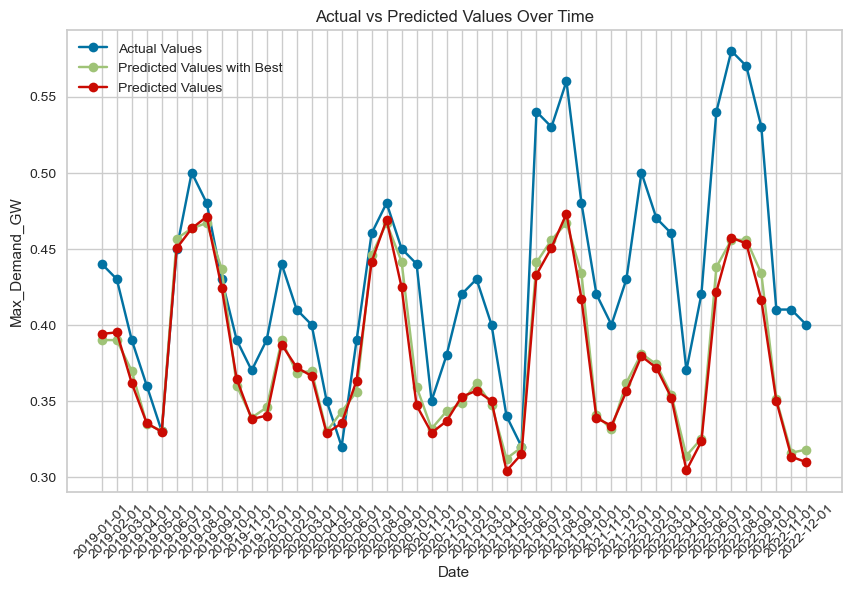

In [30]:
import matplotlib.pyplot as plt

# Plotting y_test and y_pred against date
plt.figure(figsize=(10, 6))

# Plotting y_test
plt.plot(y_test.index, y_test, label='Actual Values', marker='o')

# Plotting y_pred
plt.plot(y_test.index, y_pred_best, label='Predicted Values with Best', marker='o')

y_pred = ytest_pred
plt.plot(y_test.index, y_pred, label='Predicted Values', marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Max_Demand_GW')
plt.title('Actual vs Predicted Values Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

When the max_depth parameter is set to None in scikit-learn's RandomForestRegressor, it means that the trees in the random forest will grow until they contain min_samples_split samples or fewer in each leaf node. It doesn't restrict the depth of the trees, allowing them to grow until a certain number of samples are reached in the leaf nodes.

In your case, during the grid search, the algorithm found that the combination of hyperparameters that resulted in the best performance on the cross-validated negative mean absolute error included max_depth=None. This suggests that, for your specific dataset and problem, deeper trees without a maximum depth constraint lead to better model performance.

It's worth noting that the optimal hyperparameter values, including max_depth, can vary across different datasets and problems. The best choice for max_depth depends on the complexity of the underlying patterns in the data. For some datasets, deeper trees might capture more intricate patterns, while for others, it could lead to overfitting.

R^2 assesses the goodness of fit of a regression model on unseen or test data. 

0 indicates that the model does not explain any of the variability in the target variable.
1 indicates that the model explains all of the variability in the target variable.

In [31]:
#EVALUATE


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

#Taking the square root of Mean Squared Error (MSE) gives you the Root Mean Squared Error (RMSE). The primary reason to use RMSE instead of MSE is that it has the same scale as the original target variable, making it more interpretable and easier to relate to the actual values of the variable.

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)




# Calculate R-squared
r2b = r2_score(y_test, y_pred_best)

# Calculate Mean Absolute Error
maeb = mean_absolute_error(y_test, y_pred_best)

# Calculate Mean Squared Error
mseb = mean_squared_error(y_test, y_pred_best)

# Calculate Root Mean Squared Error
rmseb = np.sqrt(mse)

#Taking the square root of Mean Squared Error (MSE) gives you the Root Mean Squared Error (RMSE). The primary reason to use RMSE instead of MSE is that it has the same scale as the original target variable, making it more interpretable and easier to relate to the actual values of the variable.

# Calculate Explained Variance Score
explained_varianceb = explained_variance_score(y_test, y_pred_best)



# Display the results
print(f'R-squared: {r2:.4f} (Ideal: 1)')
print(f'New R-squared: {r2b:.4f} (Ideal: 1) \n')
print(f'Mean Absolute Error: {mae:.4f} (Ideal: 0)')
print(f'New Mean Absolute Error: {maeb:.4f} (Ideal: 0) \n')
print(f'Mean Squared Error: {mse:.4f} (Ideal: 0)')
print(f'New Mean Squared Error: {mseb:.4f} (Ideal: 0) \n')
print(f'Root Mean Squared Error: {rmse:.4f} (Ideal: 0)')
print(f'New Root Mean Squared Error: {rmseb:.4f} (Ideal: 0) \n')
print(f'Explained Variance Score: {explained_variance:.4f} (Ideal: 1)')
print(f'New Explained Variance Score: {explained_varianceb:.4f} (Ideal: 1)')

R-squared: -0.0438 (Ideal: 1)
New R-squared: 0.0505 (Ideal: 1) 

Mean Absolute Error: 0.0561 (Ideal: 0)
New Mean Absolute Error: 0.0535 (Ideal: 0) 

Mean Squared Error: 0.0045 (Ideal: 0)
New Mean Squared Error: 0.0041 (Ideal: 0) 

Root Mean Squared Error: 0.0669 (Ideal: 0)
New Root Mean Squared Error: 0.0669 (Ideal: 0) 

Explained Variance Score: 0.6718 (Ideal: 1)
New Explained Variance Score: 0.6805 (Ideal: 1)


WHY IS ORIG R SQUARED NEGATIVE?!1

However, in some cases, the model can perform worse than a simple horizontal line representing the mean of the target variable. In such situations, the R-squared value can be negative. A negative R-squared suggests that the model is not capturing the underlying patterns in the data and is performing worse than a model that simply predicts the mean of the target variable for all observations.

In scikit-learn, you might encounter negative R-squared values, especially when evaluating models with the r2_score function. Keep in mind that a negative R-squared indicates a poor fit of the model to the data.